## Smart healtcare framework for machine learning & intertpretable prediction of SSI

In [1]:
# pip install pandas pandasgui matplotlib seaborn sci-kit-learn # Make sure you run this cell before the rest, and restart kernel 

In [2]:
# Import neccessary tools for dataset normalization
import warnings
import pandas as pd
from pandasgui import show
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid', rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1 = pd.read_csv("Data.CSV") # Load dataset from csv file

In [3]:
df1

,REGIONS_NAME,RS_NAME,PROCEDURE_NAME,"TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')",ENCOUNTER_ID,SUBJECT_ID,ORGANIZATIONAL_UNIT_ID,SDL_ID,FORM_INSTANCE_ID,LANGUAGE_SHORT_DESC,CREATED_BY,CREATED_ON,LOCATION,PROCEDURE_DATE,PROCEDURE_NAME_1,SURVEILLANCE_PERIOD,CSEC_DURATION,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,SURGEON_ID,HOSPITAL_ADMISSION_DATE,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,CORE_TEMPERATURE,SERUM_GLUCOSE_LEVEL_DAY1,SERUM_GLUCOSE_DAY1,UNIT1,SERUM_GLUCOSE_LEVEL_DAY2,SERUM_GLUCOSE_DAY2,UNIT2,COMMENTS,MULTIPLE_PROCEDURES,MULTIPLEPROCEDURES_YES_SPECIFY,LAPAROSCOPE_ENDOSCOPE,CLOSURE_TECHNIQUE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,EVENT_DATE,DETECTED,PATOS,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER,LABORATORY,CLINICAL_DIAGNOSIS,SSI_CATEGORY,ORGANSPACE_SPECIFY,POST_PROCEDURE_BSI,HOSPITALIZATION_DEATH,DEATH_DATE,SSI_CONTRIBUTED_DEATH,Unnamed: 81,Unnamed: 82,Infants and child,Adult
0,RR,KS-MCR,CSEC,2021,6,June,"23,168,920","16,193,407","1,652","2,150","2,833,894",en,ephs.nalhamaid,50:54.8,no,00:00.0,CSEC,thirty,NaN,Yes,PET,777,00:00.0,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,57,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,RR,KS-MCR,CSEC,2021,3,March,"19,275,319","13,778,708","1,652","2,150","2,650,373",en,ephs.emahinay,48:46.1,no,00:00.0,CSEC,thirty,NaN,Yes,"TERM, BIG BABY",77,00:00.0,155,104,43.290000,No,Yes,Yes,Yes,No,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,58,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,RR,KS-MCR,CSEC,2021,3,March,"19,105,890","13,778,495","1,652","2,150","2,639,924",en,ephs.emahinay,50:26.5,no,00:00.0,CSEC,thirty,NaN,Yes,previous cs,77,00:00.0,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,126,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,RR,KS-MCR,CSEC,2021,6,June,"22,590,826","15,893,351","1,652","2,150","2,816,402",en,ephs.nalhamaid,03:08.4,no,00:00.0,CSEC,thirty,NaN,Yes,BREECH,777,00:00.0,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,Yes,2,44,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,RR,KS-MCR,CSEC,2021,6,June,"23,168,440","16,192,999","1,652","2,150","2,833,877",en,ephs.nalhamaid,42:48.1,no,00:00.0,CSEC,thirty,NaN,Yes,PREVIOUS 4 C/S,777,00:00.0,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,164,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,JZR,Smt,XLAP,2018,8,August,"1,461,201","2,655,399",858,"1,007","1,036,577",en,ephs.aashry,33:19.3,no,00:00.0,XLAP,NaN,NaN,Yes,gunshot Abdomen,Dr. Ahmed AL Hadrani,00:00.0,120,30,20.833333,No,NaN,Yes,Yes,No,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,Yes,1_Clean,Yes,5,125,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df1['SSI_EVENT'].value_counts()

no     37014
yes     1787
Name: SSI_EVENT, dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38801 entries, 0 to 38800
Data columns (total 85 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   REGIONS_NAME                                    38801 non-null  object 
 1   RS_NAME                                         38801 non-null  object 
 2   PROCEDURE_NAME                                  38801 non-null  object 
 3   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')   38801 non-null  int64  
 4   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')     38801 non-null  int64  
 5   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')  38801 non-null  object 
 6   ENCOUNTER_ID                                    38801 non-null  object 
 7   SUBJECT_ID                                      38801 non-null  object 
 8   ORGANIZATIONAL_UNIT_ID                          38801 non-null  object 
 9   SDL_ID                                 

In [6]:
df1.describe()

,"TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",CSEC_DURATION,HEIGHT,WEIGHT,BMI,SERUM_GLUCOSE_DAY1,SERUM_GLUCOSE_DAY2,ASA_SCORE,PROCEDURE_DURATION,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER,Unnamed: 81,Unnamed: 82
count,38801.000000,38801.000000,223.000000,38801.000000,38801.000000,38801.000000,2163.000000,1456.000000,38801.000000,38801.000000,660.00000,669.000000,537.000000,362.000000,165.000000,386.000000,205.000000,167.000000,338.000000,22.000000,0.0,29.000000,14.000000,24.000000,28.000000,26.000000,31.000000,16.000000,30.000000,90.000000,0.0,0.0
mean,2020.914925,5.298446,55.878924,153.065978,71.176671,29.333234,68.362922,90.545330,1.437643,56.880854,0.95000,0.983558,0.970205,0.975138,0.975758,0.976684,0.956098,0.988024,0.970414,0.954545,NaN,0.965517,0.857143,0.916667,0.964286,0.961538,0.903226,0.875000,0.600000,0.655556,NaN,NaN
std,0.456910,2.718342,77.703402,22.179964,24.505054,19.818822,57.050232,50.296735,0.633827,48.524380,0.21811,0.127265,0.170180,0.155920,0.154269,0.151101,0.205380,0.109105,0.169693,0.213201,NaN,0.185695,0.363137,0.282330,0.188982,0.196116,0.300537,0.341565,0.498273,0.477849,NaN,NaN
min,2017.000000,1.000000,0.000000,13.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2021.000000,3.000000,25.500000,154.000000,64.000000,25.560000,6.000000,80.000000,1.000000,35.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN
50%,2021.000000,5.000000,40.000000,158.000000,73.000000,29.000000,89.000000,98.000000,1.000000,46.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
75%,2021.000000,8.000000,62.500000,161.000000,85.000000,33.620000,108.000000,112.000000,2.000000,60.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
max,2021.000000,12.000000,960.000000,191.000000,901.000000,3491.120000,200.000000,200.000000,5.000000,780.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [7]:
# Droping irrelevant columns

df1.drop([
    'REGIONS_NAME', 'RS_NAME', 'PROCEDURE_NAME_1', 'LANGUAGE_SHORT_DESC', 'ORGANIZATIONAL_UNIT_ID',
    'FORM_INSTANCE_ID', 'ENCOUNTER_ID', 'SUBJECT_ID', 'SDL_ID', 'CREATED_BY', 'SURGEON_ID',
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')", "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')", 'PROCEDURE_DATE', 'CREATED_ON', 'HOSPITAL_ADMISSION_DATE',
    "Infants and child"
], axis=1, inplace=True)

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,CSEC_DURATION,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,CORE_TEMPERATURE,SERUM_GLUCOSE_LEVEL_DAY1,SERUM_GLUCOSE_DAY1,UNIT1,SERUM_GLUCOSE_LEVEL_DAY2,SERUM_GLUCOSE_DAY2,UNIT2,COMMENTS,MULTIPLE_PROCEDURES,MULTIPLEPROCEDURES_YES_SPECIFY,LAPAROSCOPE_ENDOSCOPE,CLOSURE_TECHNIQUE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,EVENT_DATE,DETECTED,PATOS,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER,LABORATORY,CLINICAL_DIAGNOSIS,SSI_CATEGORY,ORGANSPACE_SPECIFY,POST_PROCEDURE_BSI,HOSPITALIZATION_DEATH,DEATH_DATE,SSI_CONTRIBUTED_DEATH,Unnamed: 81,Unnamed: 82,Adult
0,CSEC,no,thirty,NaN,Yes,PET,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,57,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,CSEC,no,thirty,NaN,Yes,"TERM, BIG BABY",155,104,43.290000,No,Yes,Yes,Yes,No,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,58,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,CSEC,no,thirty,NaN,Yes,previous cs,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,126,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,CSEC,no,thirty,NaN,Yes,BREECH,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,Yes,2,44,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,CSEC,no,thirty,NaN,Yes,PREVIOUS 4 C/S,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,164,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,NaN,NaN,Yes,gunshot Abdomen,120,30,20.833333,No,NaN,Yes,Yes,No,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,Yes,1_Clean,Yes,5,125,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38797,XLAP,no,NaN,NaN,Yes,FT With Omphalocele,52,4,14.792899,No,No,Yes,Yes,No,Yes,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,primary,No,1_Clean,Yes,5,122,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38798,SB,no,NaN,NaN,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,39,2,13.149244,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,4_Dirty_Infected,Yes,5,65,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38799,THOR,no,NaN,NaN,Yes,Gun shot wound right lung laceration,39,2,13.149244,Yes,Yes,Yes,Yes,Yes,Yes,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,NaN,Yes,2_Clean_Contaminated,Yes,5,205,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
df1.dtypes

PROCEDURE_NAME            object
LOCATION                  object
SURVEILLANCE_PERIOD       object
CSEC_DURATION            float64
EMERGENCY                 object
                          ...   
DEATH_DATE                object
SSI_CONTRIBUTED_DEATH     object
Unnamed: 81              float64
Unnamed: 82              float64
  Adult                     bool
Length: 67, dtype: object

In [9]:
df1.isnull().sum() / df1.shape[0]

PROCEDURE_NAME           0.000000
LOCATION                 0.000000
SURVEILLANCE_PERIOD      0.012474
CSEC_DURATION            0.994253
EMERGENCY                0.000000
                           ...   
DEATH_DATE               0.999381
SSI_CONTRIBUTED_DEATH    0.999381
Unnamed: 81              1.000000
Unnamed: 82              1.000000
  Adult                  0.000000
Length: 67, dtype: float64

In [10]:
# After noticing some of the columns have almost all it value to be NAN
# We have decided to drop all of such columns because it is assumed that we do not have data for such columns

df1.isnull().sum() / df1.shape[0] # Returns the percentage of NAN is each column

n = df1.shape[0] // 2 # Taking half of the amount of the entire dataset

# For a column to remain in the dataset, it is advicable that more than half of it values most not be empty

df1.dropna(axis=1, thresh=n, inplace=True)  # Droping columns with over half of it values as NAN
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,"TERM, BIG BABY",155,104,43.290000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 C/S,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,NaN,Yes,gunshot Abdomen,120,30,20.833333,No,NaN,Yes,Yes,No,ND,No,No,Yes,1_Clean,Yes,5,125,no,False
38797,XLAP,no,NaN,Yes,FT With Omphalocele,52,4,14.792899,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,122,no,False
38798,SB,no,NaN,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,39,2,13.149244,Yes,NaN,NaN,NaN,NaN,NaN,No,No,No,4_Dirty_Infected,Yes,5,65,no,False
38799,THOR,no,NaN,Yes,Gun shot wound right lung laceration,39,2,13.149244,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,205,no,False


## Normalizing the data type of the columns and droping irrelevant columns

In [11]:
df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].str.replace('[\,/,]', '', regex=True)
# Column PRE_PROCEDURE_DIAGNOSIS normalized

In [12]:
df1['BMI'] = df1['BMI'].astype(int)
df1['BMI']

0        45
1        43
2        40
3        39
4        37
         ..
38796    20
38797    14
38798    13
38799    13
38800    27
Name: BMI, Length: 38801, dtype: int32

In [13]:
# show(df1)

In [14]:
# show(df1[df1['SSI_EVENT'] == 'yes'])
# show(df1[df1['SSI_EVENT'] == 'no'])

## Handling missing values

In [15]:
df1.isnull().sum()

PROCEDURE_NAME                     0
LOCATION                           0
SURVEILLANCE_PERIOD              484
EMERGENCY                          0
PRE_PROCEDURE_DIAGNOSIS            1
HEIGHT                             0
WEIGHT                             0
BMI                                0
OVERALL_COMPLIANCE                 0
HAIR_CLIPPED                    5234
ANTIBIOTIC_BEFORE_SURGICAL      1133
PROPHYLACTIC_ANTIBIOTIC         1683
DISCONTINUATION_PROPHYLACTIC    1350
TEMPERATURE_NORMAL               264
MULTIPLE_PROCEDURES                0
LAPAROSCOPE_ENDOSCOPE              0
TRAUMA                             0
WOUND_CLASS                        0
GENERAL_ANESTHESIA                 0
ASA_SCORE                          0
PROCEDURE_DURATION                 0
SSI_EVENT                          0
  Adult                            0
dtype: int64

In [16]:
# Handling missing values for SURVEILLANCE_PERIOD column

sp_mod = df1['SURVEILLANCE_PERIOD'].mode()[0]  # Taking the mode of the column

df1['SURVEILLANCE_PERIOD'] = df1['SURVEILLANCE_PERIOD'].fillna(value=sp_mod)  # Filling the missing values with the mode

df1['SURVEILLANCE_PERIOD'].isnull().sum()

# df1.loc[df2['SURVEILLANCE_PERIOD'] == df1['SURVEILLANCE_PERIOD'].mode()[0], ['SURVEILLANCE_PERIOD', 'SSI_EVENT']]


0

In [17]:
# Handling missing values for PRE_PROCEDURE_DIAGNOSIS column

ppd_mod = df1['PRE_PROCEDURE_DIAGNOSIS'].mode()[0]

df1.loc[df1['PRE_PROCEDURE_DIAGNOSIS'] == ppd_mod, ['PRE_PROCEDURE_DIAGNOSIS', 'SSI_EVENT']]

df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].fillna(value=ppd_mod)

df1['PRE_PROCEDURE_DIAGNOSIS'].isnull().sum()

0

In [18]:
# Handling missing values for HAIR_CLIPPED column

hc_mod = df1['HAIR_CLIPPED'].mode()[0]

df1.loc[df1['HAIR_CLIPPED'] == hc_mod, ['HAIR_CLIPPED', 'SSI_EVENT']]

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].fillna(value=hc_mod)

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].apply(lambda x: x if x != 'ND' else hc_mod)

df1['HAIR_CLIPPED'].isnull().sum()

0

In [19]:
# Handling missing values for ANTIBIOTIC_BEFORE_SURGICAL column

abs_mod = df1['ANTIBIOTIC_BEFORE_SURGICAL'].mode()[0]

df1.loc[df1['ANTIBIOTIC_BEFORE_SURGICAL'] == abs_mod, ['ANTIBIOTIC_BEFORE_SURGICAL', 'SSI_EVENT']]

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].fillna(value=abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].apply(lambda x: x if x != 'ND' else abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'].isnull().sum()

0

In [20]:
# Handling missing values for PROPHYLACTIC_ANTIBIOTIC column

pa_mod = df1['PROPHYLACTIC_ANTIBIOTIC'].mode()[0]

df1.loc[df1['PROPHYLACTIC_ANTIBIOTIC'] == pa_mod, ['PROPHYLACTIC_ANTIBIOTIC', 'SSI_EVENT']]

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].fillna(value=pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].apply(lambda x: x if x != 'ND' else pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'].isnull().sum()

0

In [21]:
# Handling missing values for DISCONTINUATION_PROPHYLACTIC column

dp_mod = df1['DISCONTINUATION_PROPHYLACTIC'].mode()[0]

df1.loc[df1['DISCONTINUATION_PROPHYLACTIC'] == dp_mod, ['DISCONTINUATION_PROPHYLACTIC', 'SSI_EVENT']]

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].fillna(value=dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].apply(lambda x: x if x != 'ND' else dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'].isnull().sum()

0

In [22]:
# Handling missing values for TEMPERATURE_NORMAL column

tn_mod = df1['TEMPERATURE_NORMAL'].mode()[0]

df1.loc[df1['TEMPERATURE_NORMAL'] == tn_mod, ['TEMPERATURE_NORMAL', 'SSI_EVENT']]

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].fillna(value=tn_mod)

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].apply(lambda x: x if x != 'ND' else tn_mod)

df1['TEMPERATURE_NORMAL'].isnull().sum()

0

In [23]:
mp_mod = df1['MULTIPLE_PROCEDURES'].mode()[0]

df1['MULTIPLE_PROCEDURES'] = df1['MULTIPLE_PROCEDURES'].apply(lambda x: x if x != 'unknown' else mp_mod)

In [24]:
df1.isnull().sum()

PROCEDURE_NAME                  0
LOCATION                        0
SURVEILLANCE_PERIOD             0
EMERGENCY                       0
PRE_PROCEDURE_DIAGNOSIS         0
HEIGHT                          0
WEIGHT                          0
BMI                             0
OVERALL_COMPLIANCE              0
HAIR_CLIPPED                    0
ANTIBIOTIC_BEFORE_SURGICAL      0
PROPHYLACTIC_ANTIBIOTIC         0
DISCONTINUATION_PROPHYLACTIC    0
TEMPERATURE_NORMAL              0
MULTIPLE_PROCEDURES             0
LAPAROSCOPE_ENDOSCOPE           0
TRAUMA                          0
WOUND_CLASS                     0
GENERAL_ANESTHESIA              0
ASA_SCORE                       0
PROCEDURE_DURATION              0
SSI_EVENT                       0
  Adult                         0
dtype: int64

In [25]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}")

PROCEDURE_NAME - 33
LOCATION - 2
SURVEILLANCE_PERIOD - 2
EMERGENCY - 2
PRE_PROCEDURE_DIAGNOSIS - 20527
HEIGHT - 154
WEIGHT - 174
BMI - 90
OVERALL_COMPLIANCE - 2
HAIR_CLIPPED - 2
ANTIBIOTIC_BEFORE_SURGICAL - 2
PROPHYLACTIC_ANTIBIOTIC - 2
DISCONTINUATION_PROPHYLACTIC - 2
TEMPERATURE_NORMAL - 2
MULTIPLE_PROCEDURES - 2
LAPAROSCOPE_ENDOSCOPE - 2
TRAUMA - 2
WOUND_CLASS - 4
GENERAL_ANESTHESIA - 2
ASA_SCORE - 5
PROCEDURE_DURATION - 404
SSI_EVENT - 2
  Adult  - 2


In [26]:
# show(df1)

## ANOMALY DETECTION AND HANDLING

In [27]:
# IQR Function to detect outlier

def anom_det(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bottom = np.percentile(data, 25) - 1.5 * iqr
    top = np.percentile(data, 75) + 1.5 * iqr
    return bottom, top

In [28]:
# Handling anomaly(outlier) for HEIGHT

h_bottom, h_top = anom_det(df1['HEIGHT'])

df1.drop(df1.loc[((df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top), ['HEIGHT']] = df1['HEIGHT'].median()
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,155,90,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,XLAP,no,thirty,Yes,PERFORATED GALLBLADDER,159,55,21,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,2_Clean_Contaminated,Yes,5,115,no,True
38789,CSEC,no,thirty,Yes,G2P139WEEKS,165,55,20,No,Yes,No,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,45,no,True
38791,CSEC,no,thirty,Yes,G1 P0+ 4+- 3 WEEKS,159,54,21,No,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,57,no,True
38793,CSEC,no,thirty,Yes,PG 34WKS WITH SEVERE PET,151,47,20,No,Yes,Yes,Yes,Yes,Yes,No,No,No,2_Clean_Contaminated,No,5,59,no,True


In [29]:
# Handling anomaly (outlier) for WEIGHT

w_bottom, w_top = anom_det(df1['WEIGHT'])

df1.drop(df1.loc[((df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top), ['WEIGHT']] = df1['WEIGHT'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,155,90,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,XLAP,no,thirty,Yes,PERFORATED GALLBLADDER,159,55,21,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,2_Clean_Contaminated,Yes,5,115,no,True
38789,CSEC,no,thirty,Yes,G2P139WEEKS,165,55,20,No,Yes,No,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,45,no,True
38791,CSEC,no,thirty,Yes,G1 P0+ 4+- 3 WEEKS,159,54,21,No,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,57,no,True
38793,CSEC,no,thirty,Yes,PG 34WKS WITH SEVERE PET,151,47,20,No,Yes,Yes,Yes,Yes,Yes,No,No,No,2_Clean_Contaminated,No,5,59,no,True


In [30]:
# # Analyzing PROCEDURE_DURATION column

pd_bottom, pd_top = anom_det(df1['PROCEDURE_DURATION'])

df1.drop(df1.loc[((df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top), ['PROCEDURE_DURATION']] = df1['PROCEDURE_DURATION'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
5,CSEC,no,thirty,Yes,PET,155,88,36,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,45,no,True
7,CSEC,no,thirty,No,G7+P5 + 1 MECONIUM STAIN,155,85,35,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,2,45,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38785,CHOL,no,thirty,Yes,gall stone,160,58,22,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,1_Clean,Yes,5,42,no,True
38786,CSEC,no,thirty,Yes,PGPG? 6 monthsTwin PregnancyRTA?IUFD both twins,160,58,22,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1_Clean,Yes,5,75,no,True
38789,CSEC,no,thirty,Yes,G2P139WEEKS,165,55,20,No,Yes,No,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,45,no,True
38791,CSEC,no,thirty,Yes,G1 P0+ 4+- 3 WEEKS,159,54,21,No,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,57,no,True


In [31]:
# Function to categorize HEIGHT and WEIGHT

def categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 50:
            category.append(0)
        elif i <= 100:
            category.append(1)
        elif i <= 150:
            category.append(2)
        elif i <= 200:
            category.append(3)
        else:
            category.append(4)
    return category

# Function to categorize PROCEDURE_DURATION

def p_categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 60:
            category.append(0)
        elif i <= 120:
            category.append(1)
        elif i <= 180:
            category.append(2)
        elif i <= 240:
            category.append(3)
        elif i <= 300:
            category.append(4)
        elif i <= 360:
            category.append(5)
        else:
            category.append(6)
    return category

In [32]:
# Setting categories for HEIGHT and WEIGHT

df1['HEIGHT'] = categorize(df1['HEIGHT'])

df1['WEIGHT'] = categorize(df1['WEIGHT'])

df1['PROCEDURE_DURATION'] = p_categorize(df1['PROCEDURE_DURATION'])

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,3,2,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,3,2,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
3,CSEC,no,thirty,Yes,BREECH,3,1,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,0,no,True
5,CSEC,no,thirty,Yes,PET,3,1,36,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
7,CSEC,no,thirty,No,G7+P5 + 1 MECONIUM STAIN,3,1,35,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,2,0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38785,CHOL,no,thirty,Yes,gall stone,3,1,22,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,1_Clean,Yes,5,0,no,True
38786,CSEC,no,thirty,Yes,PGPG? 6 monthsTwin PregnancyRTA?IUFD both twins,3,1,22,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1_Clean,Yes,5,1,no,True
38789,CSEC,no,thirty,Yes,G2P139WEEKS,3,1,20,No,Yes,No,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,0,no,True
38791,CSEC,no,thirty,Yes,G1 P0+ 4+- 3 WEEKS,3,1,21,No,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,0,no,True


In [33]:
df1.reset_index(inplace=True)
df1.drop(['index'], inplace=True, axis=1)

In [34]:
# df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'acut appendix' if 'append' in x.lower() else x)
# df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'CS' if 'cs' in x.lower() else x)

In [35]:
# df1['PRE_PROCEDURE_DIAGNOSIS'].value_counts()

In [36]:
# show(df1)

In [37]:
# Increasing dimentionality from PRE_PROCEDURE_DIAGNOSIS column and droping duplicates

df1['CANCER_FEVER_or_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(
    lambda x: 'yes' if ('canc' in x.lower()) or ('feve' in x.lower()) or ('diab' in x.lower()) else 'no'
)

# df1['HAS_CANCER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'cancer' in x.lower() else 'no')

# df1['HAS_FEVER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'fever' in x.lower() else 'no')

# df1['HAS_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'diabet' in x.lower() else 'no')

# df1.reset_index(inplace=True)

df = df1.drop(['PRE_PROCEDURE_DIAGNOSIS'], axis=1)

# df.drop_duplicates(keep='first', inplace=True) # Droping duplicate data to avoid overfiting

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,CSEC,no,thirty,Yes,3,2,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
1,CSEC,no,thirty,Yes,3,2,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
2,CSEC,no,thirty,Yes,3,1,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,0,no,True,no
3,CSEC,no,thirty,Yes,3,1,36,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
4,CSEC,no,thirty,No,3,1,35,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,2,0,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31592,CHOL,no,thirty,Yes,3,1,22,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,1_Clean,Yes,5,0,no,True,no
31593,CSEC,no,thirty,Yes,3,1,22,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1_Clean,Yes,5,1,no,True,no
31594,CSEC,no,thirty,Yes,3,1,20,No,Yes,No,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,0,no,True,no
31595,CSEC,no,thirty,Yes,3,1,21,No,Yes,Yes,Yes,Yes,Yes,No,No,No,1_Clean,Yes,5,0,no,True,no


In [38]:
df['SSI_EVENT'].value_counts()

no     29810
yes     1787
Name: SSI_EVENT, dtype: int64

In [39]:
# show(df)

## CHANGING COLUMNS TO NUMERIC

In [40]:
# function to creat dummies (numeric values) for dataset

def dummyrize(x):
    dummies = []
    unique_list = list(x.unique())
    values_list = list(x.values)
    if unique_list == ['yes', 'no']:
        unique_list = ['no', 'yes']
    for i in values_list:
        dummies.append(unique_list.index(i))
    return dummies

In [41]:
# Change affected columns

nw = ['PROCEDURE_DURATION', 'ASA_SCORE', 'WEIGHT', 'HEIGHT', 'BMI']
columns_list = df.columns
for i in columns_list:
    if i not in nw:
        df[i] = dummyrize(df[i])

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
3,0,0,0,0,3,1,36,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,3,1,35,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31592,4,0,0,0,3,1,22,0,0,0,0,1,0,0,1,0,0,1,5,0,0,0,0
31593,0,0,0,0,3,1,22,0,0,0,1,1,0,1,0,1,0,1,5,1,0,0,0
31594,0,0,0,0,3,1,20,0,0,1,0,1,0,0,0,0,0,1,5,0,0,0,0
31595,0,0,0,0,3,1,21,0,0,0,0,1,0,0,0,0,0,1,5,0,0,0,0


In [42]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
count,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000,31597.000000
mean,0.313954,0.056271,0.020983,0.394183,2.894072,1.025477,30.074754,0.679875,0.071019,0.044624,0.036871,0.847296,0.013039,0.007532,0.041048,0.018673,0.517992,0.304364,1.408551,0.099978,0.056556,0.001772,0.000696
std,1.415596,0.230448,0.143330,0.488682,0.307750,0.242920,20.262203,0.466532,0.256861,0.206481,0.188447,0.359708,0.113444,0.086463,0.198405,0.135368,0.525674,0.460145,0.579293,0.299975,0.230996,0.042062,0.026378
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3491.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


## Data preparation

In [43]:
# Dropping duplicated datapoints

df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
3,0,0,0,0,3,1,36,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,3,1,35,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,4,0,0,0,3,1,22,0,0,0,0,1,0,0,1,0,0,1,5,0,0,0,0
7406,0,0,0,0,3,1,22,0,0,0,1,1,0,1,0,1,0,1,5,1,0,0,0
7407,0,0,0,0,3,1,20,0,0,1,0,1,0,0,0,0,0,1,5,0,0,0,0
7408,0,0,0,0,3,1,21,0,0,0,0,1,0,0,0,0,0,1,5,0,0,0,0


In [44]:
df['SSI_EVENT'].value_counts()

0    5920
1    1490
Name: SSI_EVENT, dtype: int64

In [45]:
df2 = df.drop(['SSI_EVENT'], axis=1)
df3 = df2[df2.duplicated()]

p_list = [1 for i in range(df3.shape[0])]

df3['SSI_EVENT'] = p_list

df3

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,Adult,CANCER_FEVER_or_DIABETIS,SSI_EVENT
5858,0,0,0,0,3,1,29,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
5862,0,0,0,0,3,1,24,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,1
5864,0,0,0,0,3,1,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5865,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,1,0,2,0,0,0,1
5870,0,0,0,0,3,1,24,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,0,0,1
7288,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,0,0,1
7314,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1
7323,0,0,0,1,3,1,23,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1


In [46]:
print(df2.shape)
df4 = df2.drop_duplicates(keep=False)
print(df4.shape)
df5 = df.loc[df4.index]
df6 = pd.concat([df5, df3], ignore_index=True)
df6

(7410, 22)
(6370, 22)


,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
3,0,0,0,0,3,1,36,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,3,1,35,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
6886,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
6887,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0
6888,0,0,0,1,3,1,23,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [47]:
df6['SSI_EVENT'].value_counts()

0    5400
1    1490
Name: SSI_EVENT, dtype: int64

In [48]:
df = df6.drop_duplicates(keep='first', ignore_index=True)
df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
3,0,0,0,0,3,1,36,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,3,1,35,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
6886,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
6887,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0
6888,0,0,0,1,3,1,23,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [49]:
# dataset balancing by making the 'yes' class 50% of the dataset

n = df[df['SSI_EVENT'] == 1].shape[0]  # getting the amount of 'yes' class available in the dataset

total_data = (100 * n) // 50 # Total amount of data required if yes is 55% of the dataset

no_required = total_data - n # amount of no required in the dataset

m = df[df['SSI_EVENT'] == 0].shape[0]  # getting the requried amount of 'no' class needed for the dataset

l = m - no_required # ratio amount of rows to be droped

rows_to_drop = df.query('(SSI_EVENT == 0)').sample(n=l)  # taking random n samples to be droped

df.drop(rows_to_drop.index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,1,3,1,29,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,29,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
3,0,0,0,0,3,1,26,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,0,3,1,23,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
2976,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,1,0,0
2977,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0
2978,0,0,0,1,3,1,23,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [50]:
df['SSI_EVENT'].value_counts()

0    1490
1    1490
Name: SSI_EVENT, dtype: int64

## EDA and FEATURE SELECTION

In [51]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
count,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000
mean,1.514765,0.068456,0.074161,0.369463,2.825168,1.032550,31.137584,0.452685,0.137584,0.123154,0.124161,0.736242,0.039597,0.044631,0.083221,0.094966,0.577852,0.571141,1.647651,0.205369,0.500000,0.018456,0.006376
std,3.490569,0.252570,0.262077,0.482740,0.379887,0.352349,63.879722,0.497840,0.344521,0.328669,0.329821,0.440744,0.195044,0.206527,0.276263,0.293218,0.658800,0.494996,0.808654,0.404039,0.500084,0.134617,0.079607
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,31.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3491.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PROCEDURE_NAME                2980 non-null   int64
 1   LOCATION                      2980 non-null   int64
 2   SURVEILLANCE_PERIOD           2980 non-null   int64
 3   EMERGENCY                     2980 non-null   int64
 4   HEIGHT                        2980 non-null   int64
 5   WEIGHT                        2980 non-null   int64
 6   BMI                           2980 non-null   int32
 7   OVERALL_COMPLIANCE            2980 non-null   int64
 8   HAIR_CLIPPED                  2980 non-null   int64
 9   ANTIBIOTIC_BEFORE_SURGICAL    2980 non-null   int64
 10  PROPHYLACTIC_ANTIBIOTIC       2980 non-null   int64
 11  DISCONTINUATION_PROPHYLACTIC  2980 non-null   int64
 12  TEMPERATURE_NORMAL            2980 non-null   int64
 13  MULTIPLE_PROCEDURES           298

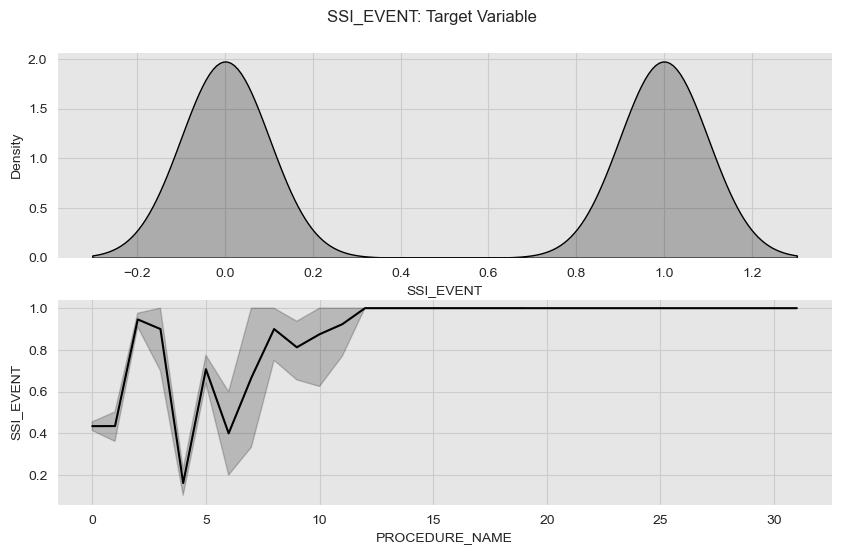

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.kdeplot(x='SSI_EVENT', data=df, fill=True, color='black', ax=ax[0]) # Target variable only
sns.lineplot(x='PROCEDURE_NAME', y='SSI_EVENT', data=df, color='black', ax=ax[1])
fig.suptitle('SSI_EVENT: Target Variable', y=0.95);

<AxesSubplot:xlabel='SSI_EVENT', ylabel='count'>

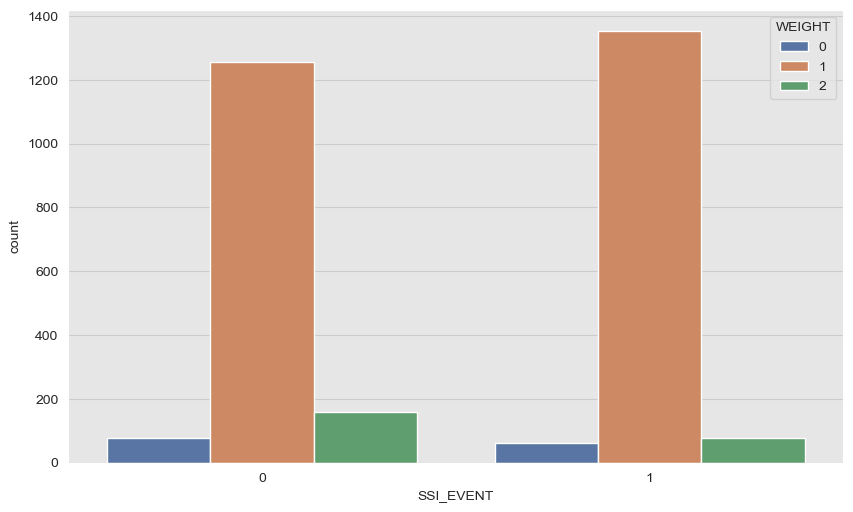

In [54]:
# Analyzing the features

sns.countplot(x='SSI_EVENT', hue='WEIGHT', data=df)

<AxesSubplot:xlabel='SSI_EVENT', ylabel='count'>

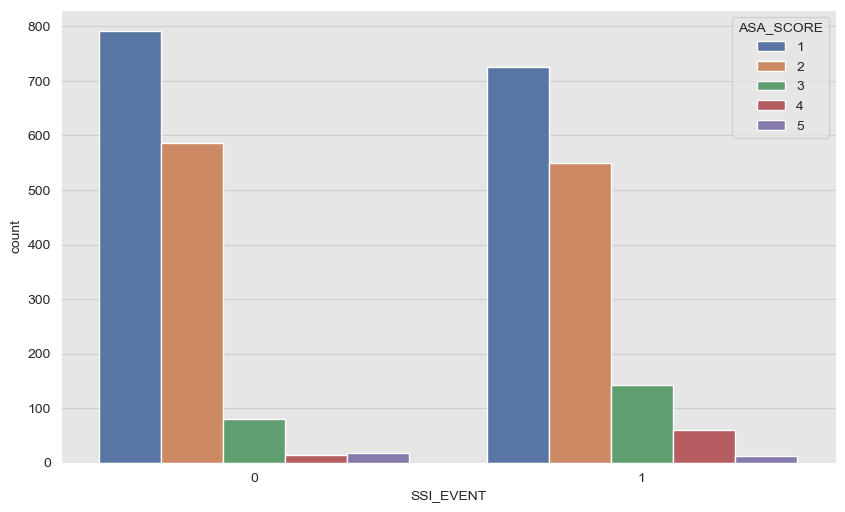

In [55]:
sns.countplot(x='SSI_EVENT', hue='ASA_SCORE', data=df)

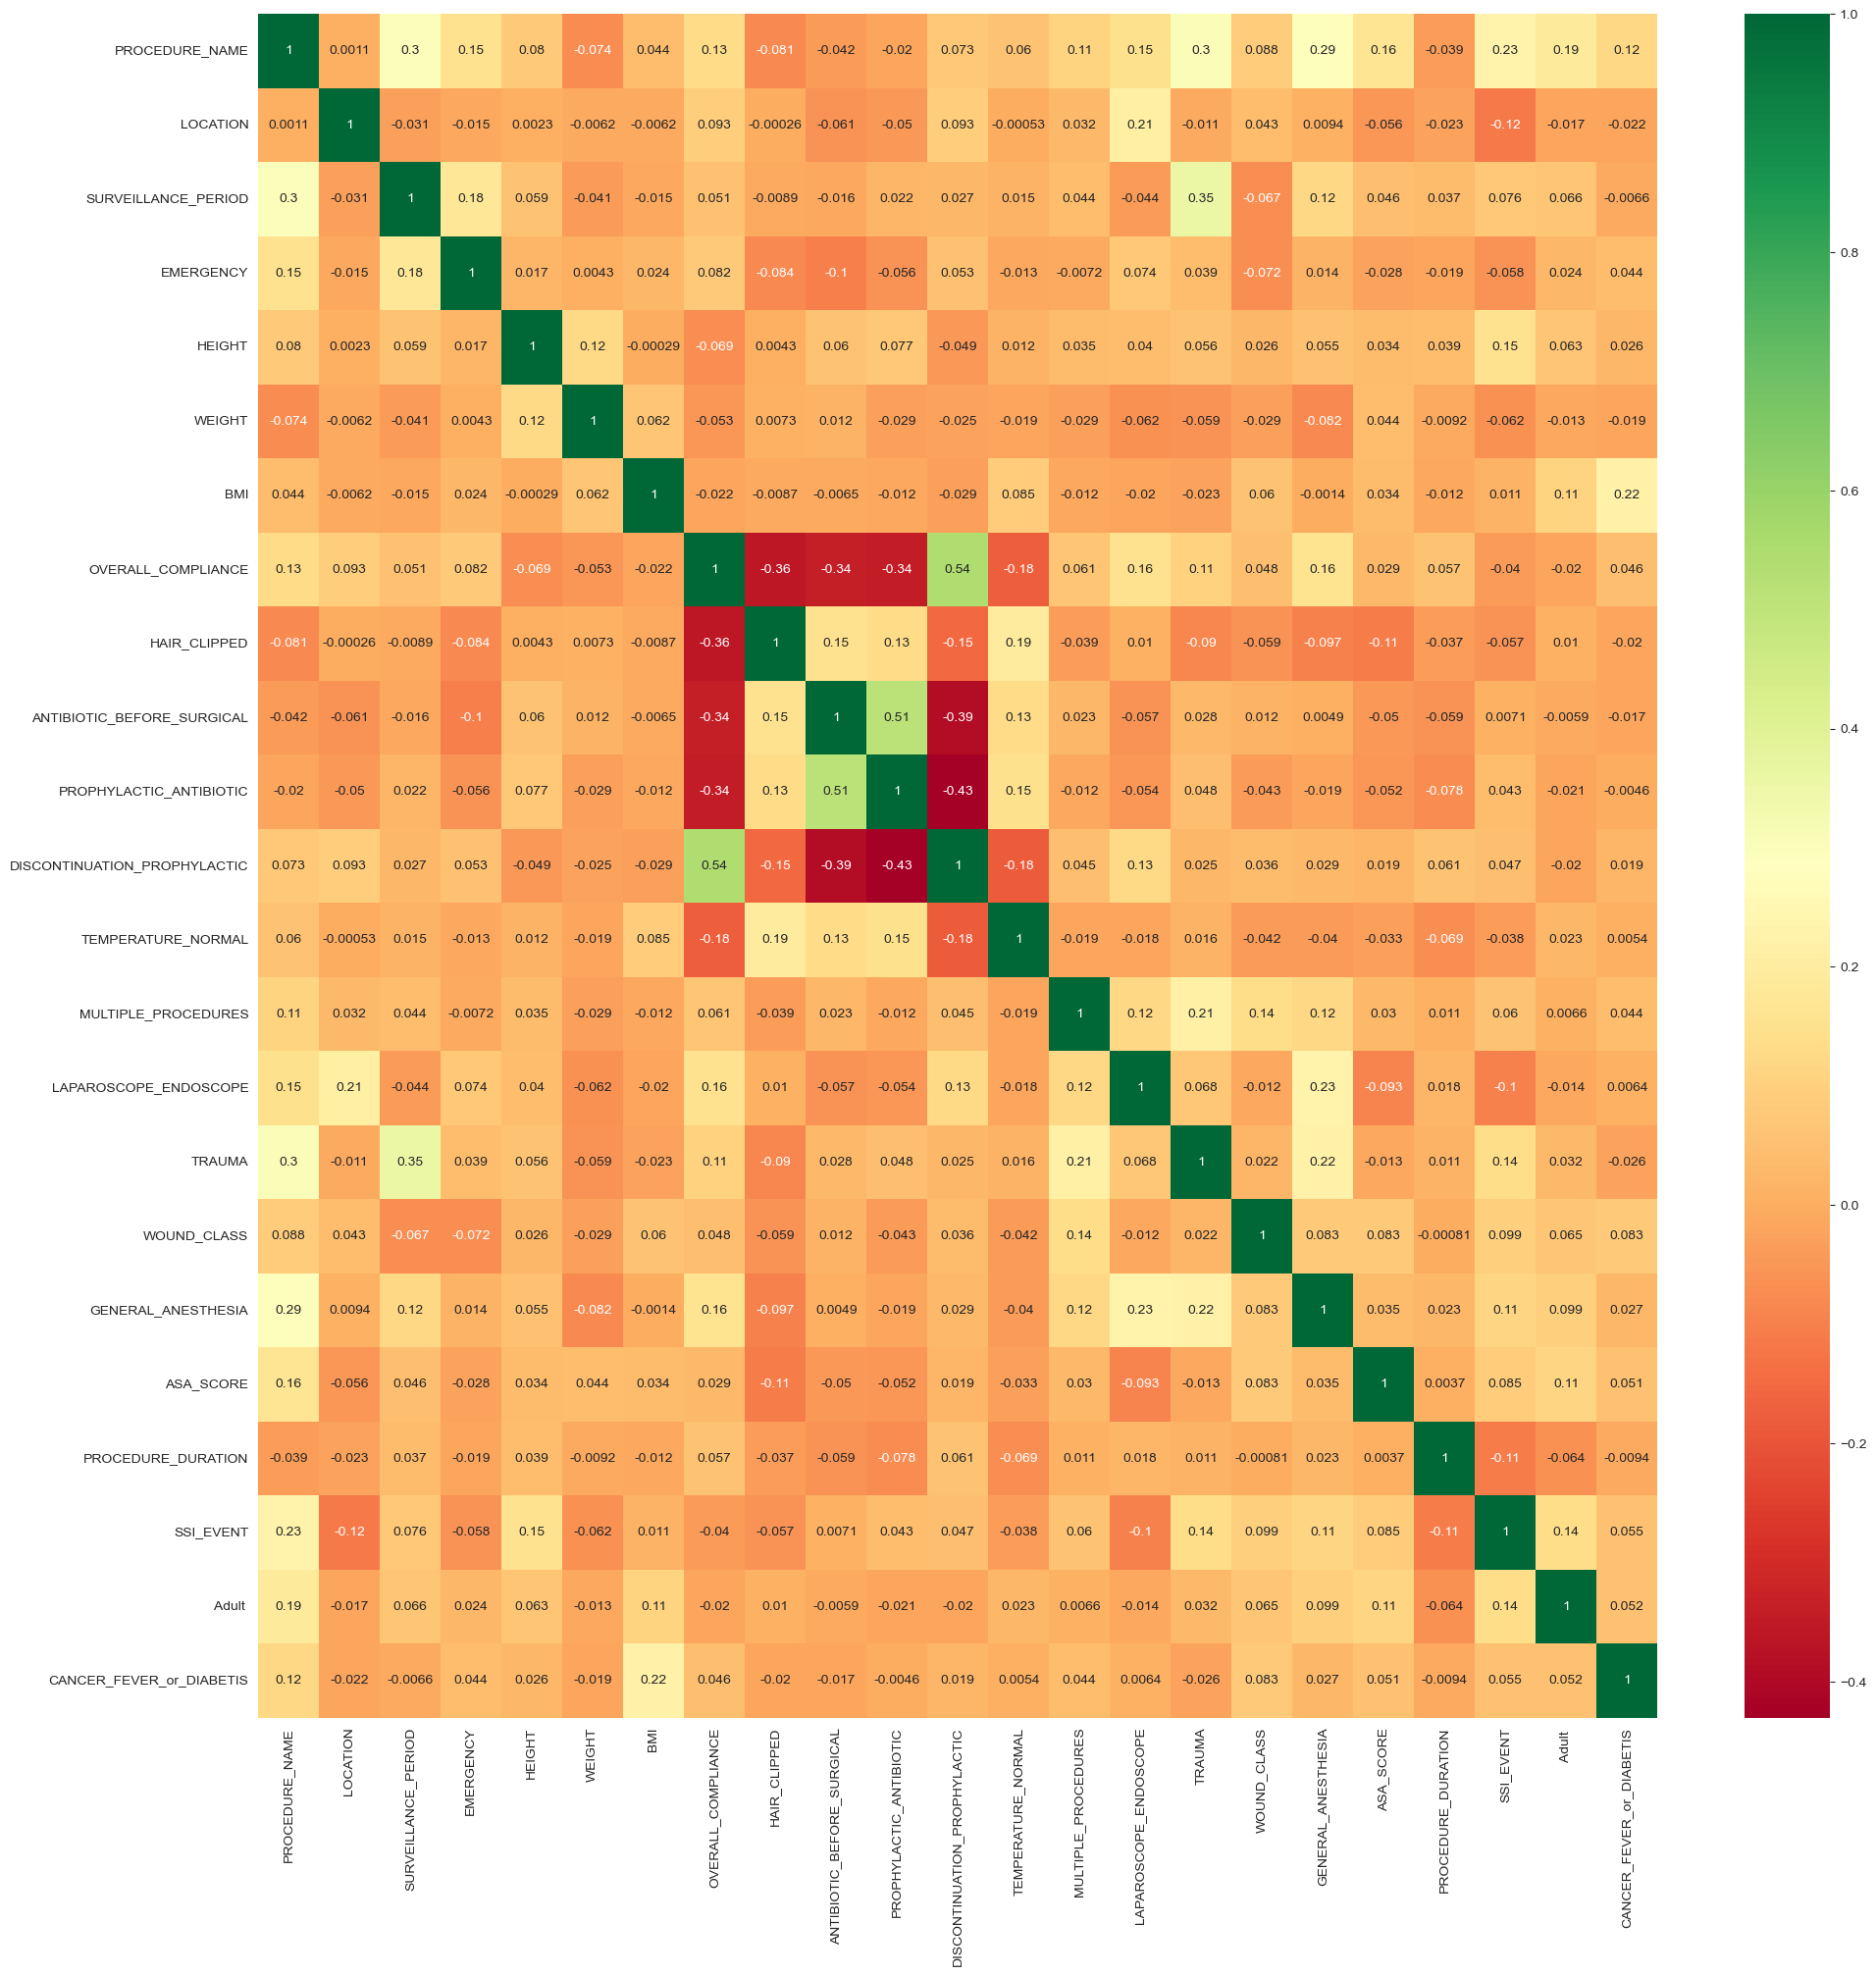

In [56]:
# calculating the correlation matrix to get the relationship between columns

df_corr = df.corr()
t_corr = df_corr.index
plt.figure(figsize=(df.shape[1], df.shape[1]))
graph = sns.heatmap(df[t_corr].corr(), annot=True, cmap='RdYlGn')

In [57]:
# data = pd.read_csv('dataset1.csv')
# data = data[['PROCEDURE_NAME', 'LOCATION', 'SURVEILLANCE_PERIOD',
#        'EMERGENCY', 'HEIGHT', 'WEIGHT', 'OVERALL_COMPLIANCE', 'HAIR_CLIPPED',
#        'ANTIBIOTIC_BEFORE_SURGICAL', 'PROPHYLACTIC_ANTIBIOTIC',
#        'DISCONTINUATION_PROPHYLACTIC', 'TEMPERATURE_NORMAL',
#        'MULTIPLE_PROCEDURES', 'LAPAROSCOPE_ENDOSCOPE', 'TRAUMA', 'WOUND_CLASS',
#        'GENERAL_ANESTHESIA', 'ASA_SCORE', 'PROCEDURE_DURATION', 'SSI_EVENT',
#        'CANCER_FEVER_or_DIABETIS']]

data = df

x = data.drop('SSI_EVENT', axis=1)
y = data['SSI_EVENT']
x

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,1,3,1,29,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,3,1,29,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0
3,0,0,0,0,3,1,26,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,3,1,23,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,0,0
2976,0,0,0,0,3,1,25,1,0,0,0,1,0,0,0,0,0,1,2,1,0,0
2977,0,0,0,1,3,1,25,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0
2978,0,0,0,1,3,1,23,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


## Truncated Singular Value Decomposition (SVD)

['truncatedsvd0' 'truncatedsvd1' 'truncatedsvd2' 'truncatedsvd3'
 'truncatedsvd4' 'truncatedsvd5' 'truncatedsvd6' 'truncatedsvd7'
 'truncatedsvd8' 'truncatedsvd9' 'truncatedsvd10' 'truncatedsvd11'
 'truncatedsvd12' 'truncatedsvd13' 'truncatedsvd14' 'truncatedsvd15'
 'truncatedsvd16' 'truncatedsvd17' 'truncatedsvd18' 'truncatedsvd19'
 'truncatedsvd20' 'truncatedsvd21']


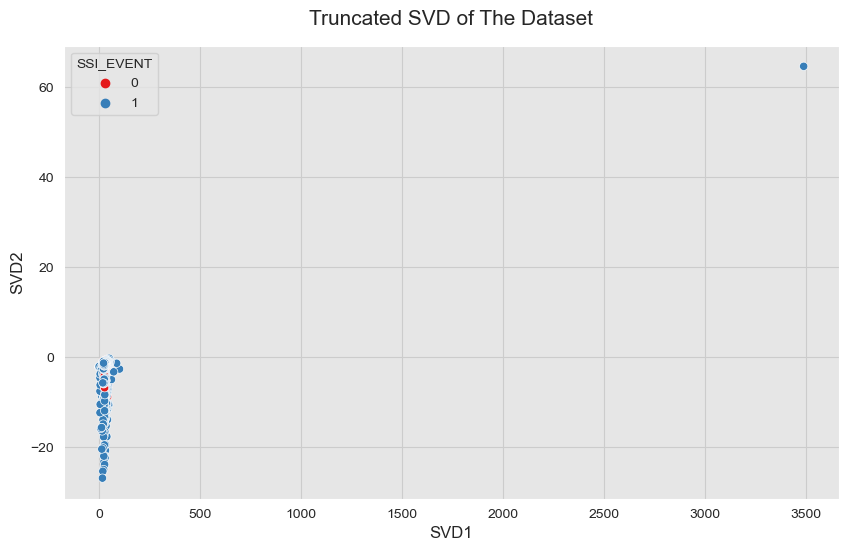

In [58]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=x.shape[1], algorithm='randomized', random_state=0)

svd_data = svd.fit_transform(x)

names = svd.get_feature_names_out()
print(names)

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13.5 ,4))

sns.scatterplot(svd_data[:, 0], svd_data[:, 1], hue=y, palette='Set1')
plt.title("Truncated SVD of The Dataset", fontsize=15, pad=15)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.show()

In [59]:
svd_df = pd.DataFrame(data=svd_data, columns=names)

In [60]:
# data.to_csv('dataset2.csv')

## MODELLING

In [61]:
from sklearn import model_selection as ms
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

In [62]:
x = svd_df
y = data['SSI_EVENT']
# Split dataset into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.20, random_state=5)

In [63]:
models_list = []
models_list.append(('LR', LogisticRegression(random_state=1)))
models_list.append(('DTC', DecisionTreeClassifier(random_state=1)))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('GNB', GaussianNB()))
models_list.append(('SVM', SVC(kernel='rbf', gamma='auto', random_state=1)))
models_list.append(('RF', RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)))

In [64]:
models = []
outcomes = []

for name, model in models_list:
    kfold = ms.KFold(random_state=5, n_splits=10, shuffle=True)
    cross_val = ms.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    outcomes.append(cross_val)
    models.append(name)
    print(f"{name}: {cross_val.mean()} - {cross_val.std()}")
    print(f"accuracy: {accuracy_score(y_test, pred)}")
    combine = pd.DataFrame(dict(actual=y_test, prediction=pred))
    print(' ')
    print('confusion matrix')
    print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
    print(' ')
    print('classification report')
    print(classification_report(y_test, pred))
    print(' ')
    print('------------------------------------------------------------------')
    print(' ')

LR: 0.6577335536725151 - 0.025851279763238297
accuracy: 0.6577181208053692
 
confusion matrix
prediction    0    1
actual              
0           207   88
1           116  185
 
classification report
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       295
           1       0.68      0.61      0.64       301

    accuracy                           0.66       596
   macro avg       0.66      0.66      0.66       596
weighted avg       0.66      0.66      0.66       596

 
------------------------------------------------------------------
 
DTC: 0.6501476741324145 - 0.025250751910039584
accuracy: 0.6963087248322147
 
confusion matrix
prediction    0    1
actual              
0           204   91
1            90  211
 
classification report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       295
           1       0.70      0.70      0.70       301

    accuracy                     

accuracy: 0.6493288590604027
 
confusion matrix
prediction    0    1
actual              
0           185  110
1            99  202
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       295
           1       0.65      0.67      0.66       301

    accuracy                           0.65       596
   macro avg       0.65      0.65      0.65       596
weighted avg       0.65      0.65      0.65       596

------------------------------------------------------------------


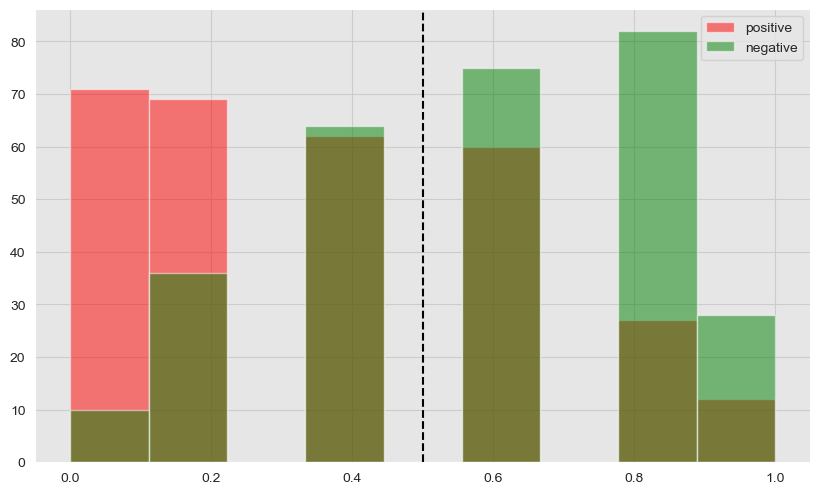

In [65]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, kn_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=kn_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, kn_pred))
print('------------------------------------------------------------------')
y_probs = kn.predict_proba(X_test)[:,0]
ths = np.linspace(0,1,20)
sensitivity = [recall_score(y_test, y_probs >= t) for t in ths]
specitivity = [precision_score(y_test, y_probs >= t) for t in ths]
# plt.plot(ths, sensitivity, label='sensitivity')
# plt.plot(ths, specitivity, label='specitivity')
# plt.legend()
# Specify range to ensure both groups show up the same width.
bins = np.linspace(0,1,10)

# Show distributions of estimated probabilities for the two classes.
plt.hist(y_probs[y_test == 1], alpha=0.5, color='red', label='positive', bins=bins)
plt.hist(y_probs[y_test == 0], alpha=0.5, color='green', label='negative', bins=bins)

# Show the threshold.
plt.axvline(0.5, c='black', ls='dashed')

# Add labels
plt.legend()

# threshold=0.5
# cm = confusion_matrix(y_test, kn_pred)
# predicted_class=np.zeros(kn_pred.shape)
# predicted_class[kn_pred>threshold]=1
# sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
# print('Sensitivity : ', sensitivity )

# specificity = cm[1,1]/(cm[1,0]+cm[1,1])
# print('Specificity : ', specificity)

In [66]:
svc = SVC(kernel='rbf', gamma='auto', random_state=1, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, svc_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=svc_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, svc_pred))
print('------------------------------------------------------------------')

accuracy: 0.7080536912751678
 
confusion matrix
prediction    0    1
actual              
0           238   57
1           117  184
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       295
           1       0.76      0.61      0.68       301

    accuracy                           0.71       596
   macro avg       0.72      0.71      0.71       596
weighted avg       0.72      0.71      0.71       596

------------------------------------------------------------------


accuracy: 0.7348993288590604
 
confusion matrix
prediction    0    1
actual              
0           227   68
1            90  211
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       295
           1       0.76      0.70      0.73       301

    accuracy                           0.73       596
   macro avg       0.74      0.74      0.73       596
weighted avg       0.74      0.73      0.73       596

------------------------------------------------------------------


<AxesSubplot:>

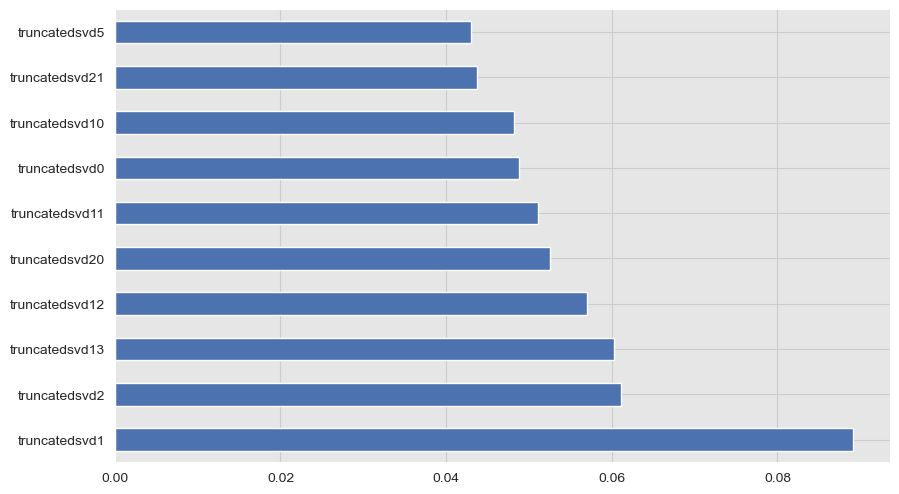

In [67]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, rf_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=rf_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, rf_pred))
print('------------------------------------------------------------------')

# Plot the feature importance
fi = pd.Series(rf.feature_importances_, index=X_test.columns)
fi.nlargest(10).plot(kind='barh')

In [68]:
# Compute the permutation importance for each model

from sklearn.inspection import permutation_importance

kn_pi = permutation_importance(
    estimator=kn,
    X=X_train,
    y=y_train,
    n_repeats=10
)

rf_pi = permutation_importance(
    estimator=rf,
    X=X_train,
    y=y_train,
    n_repeats=10
)

kn_perm_sorted_idx = kn_pi.importances_mean.argsort()[::-1]
rf_perm_sorted_idx = rf_pi.importances_mean.argsort()[::-1]

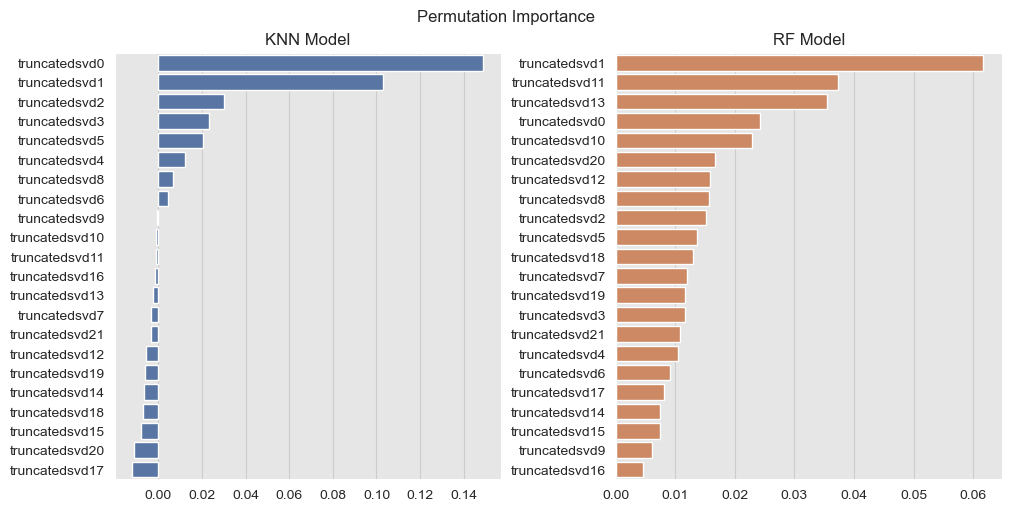

In [69]:
# Plot the permutaion importance

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)

sns.barplot(
    x=kn_pi.importances_mean[kn_perm_sorted_idx],
    y=X_train.columns[kn_perm_sorted_idx],
    orient='h',
    color=sns_c[0],
    ax=ax[0]
)
ax[0].set(title='KNN Model');

sns.barplot(
    x=rf_pi.importances_mean[rf_perm_sorted_idx],
    y=X_train.columns[rf_perm_sorted_idx],
    orient='h',
    color=sns_c[1],
    ax=ax[1]
)
ax[1].set(title='RF Model')

fig.suptitle('Permutation Importance');

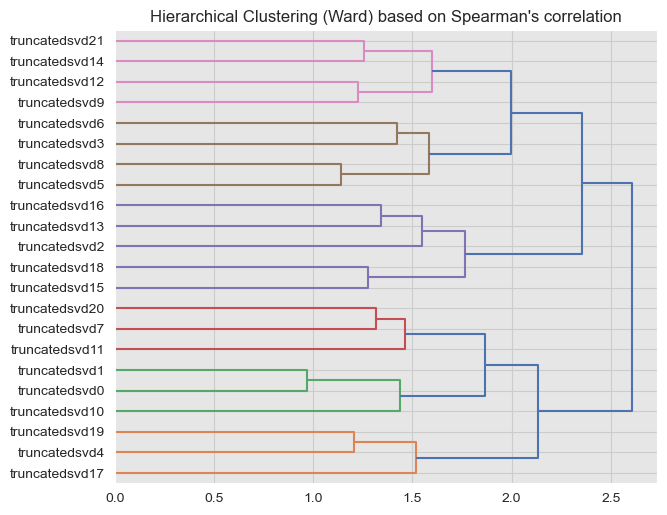

In [70]:
# Plot the hierarchy of the correlation in the features

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

corr = spearmanr(a=X_train).correlation
corr_linkage = hierarchy.ward(y=corr)

fig, ax = plt.subplots(figsize=(7, 6))
dendro = hierarchy.dendrogram(
    Z=corr_linkage,
    labels=X_train.columns, 
    orientation='right',
    ax=ax
)

ax.set(title="Hierarchical Clustering (Ward) based on Spearman's correlation");

In [71]:
import shap
shap.initjs()
 
# Get the model explainer object
knn_explainer = shap.KernelExplainer(kn.predict, X_test)

# Get shap values for the test data observation
knn_shap_values = knn_explainer.shap_values(X_test, nsamples=100)

# Get the model explainer object for RF model
rf_explainer = shap.KernelExplainer(kn.predict, X_test)

# Get shap values for the test data observation for RF model
rf_shap_values = rf_explainer.shap_values(X_test, nsamples=100)

Using 596 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/596 [00:00<?, ?it/s]

Using 596 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/596 [00:00<?, ?it/s]

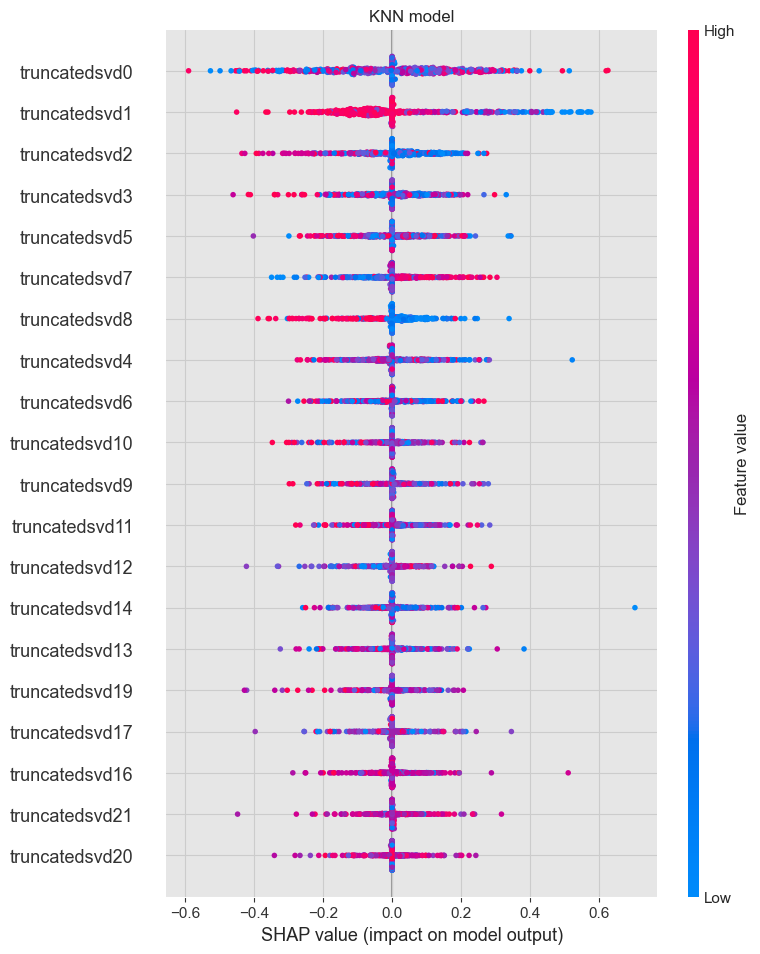

In [72]:
# Plot the shap summary graph for KNN model
shap.summary_plot(knn_shap_values, X_test, show=False)
plt.title("KNN model")
plt.show()

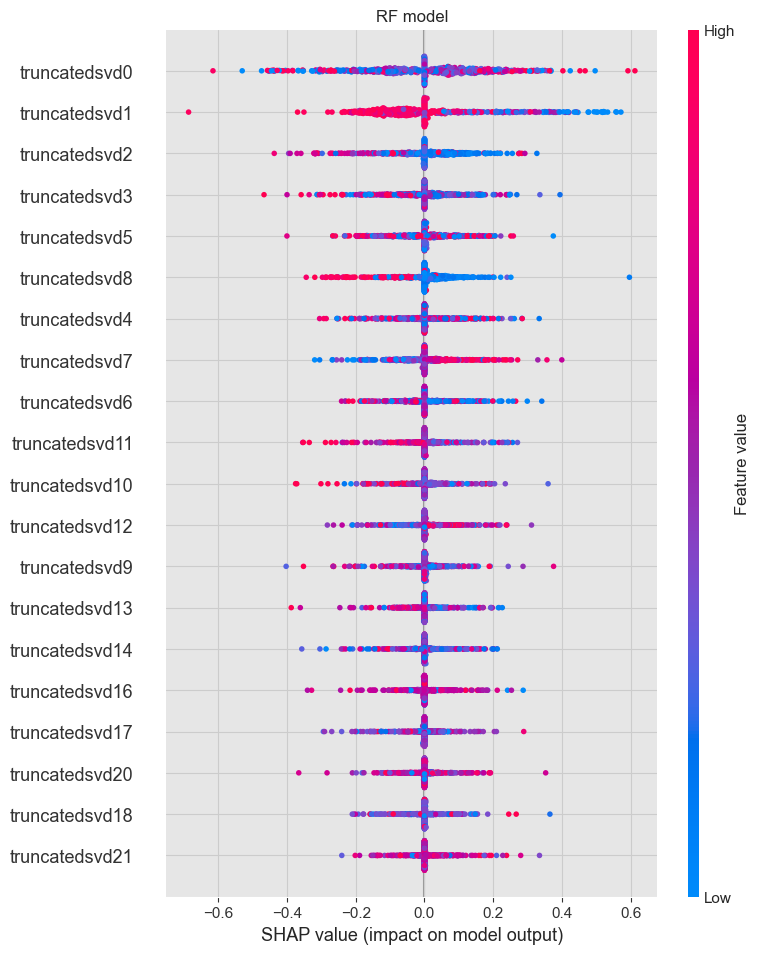

In [73]:
# Plot the shap summary graph for RF model
shap.summary_plot(rf_shap_values, X_test, show=False)
plt.title("RF model")
plt.show()

## Stochastic Gradient Descent (SGD)

In [74]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [75]:
sgd = SGDClassifier(loss="log")
sgd.fit(X_train, y_train)

SGDClassifier(loss='log')

accuracy: 0.5973154362416108
 
Confusion Matrix


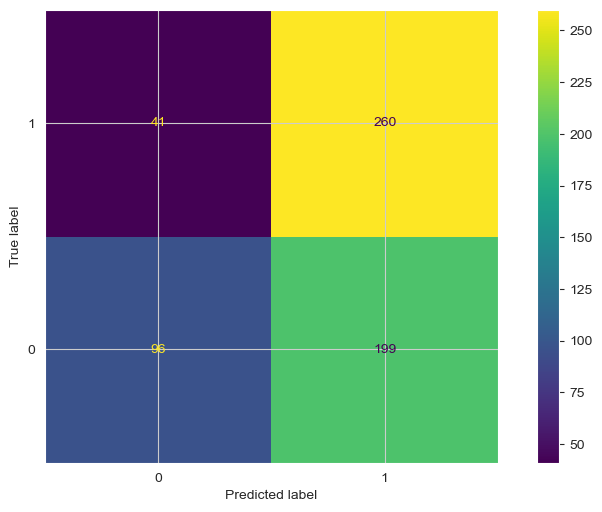

 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.33      0.44       295
           1       0.57      0.86      0.68       301

    accuracy                           0.60       596
   macro avg       0.63      0.59      0.56       596
weighted avg       0.63      0.60      0.57       596

------------------------------------------------------------------


In [82]:
sgd_pred = sgd.predict(X_test)
cfm = confusion_matrix(y_test, sgd_pred)
print(f"accuracy: {accuracy_score(y_test, sgd_pred)}")
print(" ")
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
print("Confusion Matrix")
plt.show()
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, sgd_pred))
print('------------------------------------------------------------------')

In [77]:
prob = [0 for i in range(len(y_test))]
kn_prob = kn.predict_proba(X_test)
rf_prob = rf.predict_proba(X_test)
svc_prob = svc.predict_proba(X_test)
sgd_prob = sgd.predict_proba(X_test)

kn_prob = kn_prob[:, 1]
rf_prob = rf_prob[:, 1]
svc_prob = svc_prob[:, 1]
sgd_prob = sgd_prob[:, 1]

auc = round(roc_auc_score(y_test, prob), 2)
kn_auc = round(roc_auc_score(y_test, kn_prob), 2)
rf_auc = round(roc_auc_score(y_test, rf_prob), 2)
svc_auc = round(roc_auc_score(y_test, svc_prob), 2)
sgd_auc = round(roc_auc_score(y_test, sgd_prob), 2)

print(f'Prediction chance at random: AUCROC = {auc}')
print(f'KNN AUCROC = {kn_auc}')
print(f'RF AUCROC = {rf_auc}')
print(f'SVC AUCROC = {svc_auc}')
print(f'SGD AUCROC = {sgd_auc}')

Prediction chance at random: AUCROC = 0.5
KNN AUCROC = 0.71
RF AUCROC = 0.78
SVC AUCROC = 0.77
SGD AUCROC = 0.69


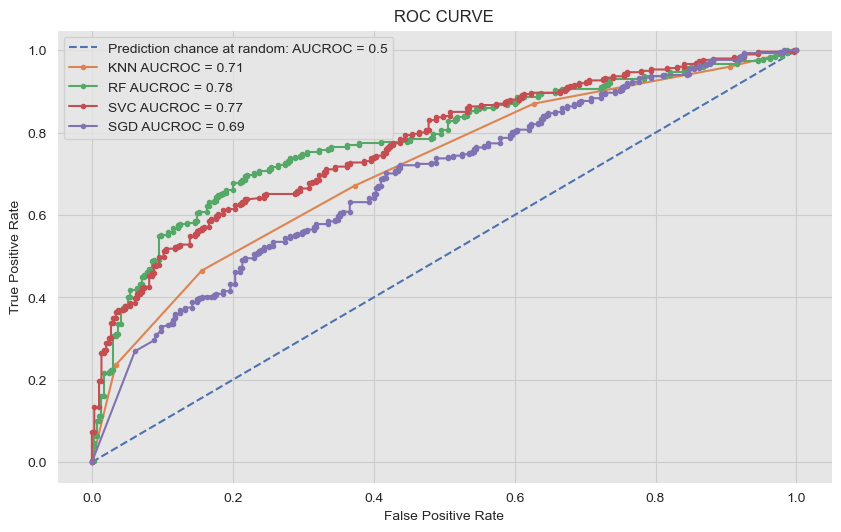

In [78]:
fpr, tpr, i = roc_curve(y_test, prob)
kn_fpr, kn_tpr, kn_i = roc_curve(y_test, kn_prob)
rf_fpr, rf_tpr, rf_i = roc_curve(y_test, rf_prob)
svc_fpr, svc_tpr, svc_i = roc_curve(y_test, svc_prob)
sgd_fpr, sgd_tpr, sgd_i = roc_curve(y_test, sgd_prob)

plt.plot(fpr, tpr, linestyle='--', label=f'Prediction chance at random: AUCROC = {auc}')
plt.plot(kn_fpr, kn_tpr, marker='.', label=f'KNN AUCROC = {kn_auc}')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'RF AUCROC = {rf_auc}')
plt.plot(svc_fpr, svc_tpr, marker='.', label=f'SVC AUCROC = {svc_auc}')
plt.plot(sgd_fpr, sgd_tpr, marker='.', label=f'SGD AUCROC = {sgd_auc}')
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ANN MODEL

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [80]:
ann = Sequential()
ann.add(Dense(64, input_dim=len(X_train.columns), activation="relu"))
ann.add(Dense(32, activation="relu"))
ann.add(Dense(16, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = ann.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.30)

Epoch 1/20
53/53 [==============================] - 1s 6ms/step - loss: 0.7208 - accuracy: 0.5438 - val_loss: 0.6530 - val_accuracy: 0.5587
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.5707 - val_loss: 0.6416 - val_accuracy: 0.6103
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.5935 - val_loss: 0.6589 - val_accuracy: 0.6103
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6055 - val_loss: 0.6711 - val_accuracy: 0.5349
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6109 - val_loss: 0.6244 - val_accuracy: 0.6215
Epoch 6/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6229 - val_loss: 0.6335 - val_accuracy: 0.6187
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6415 - val_loss: 0.6553 - val_accuracy: 0.5712
Epoch 8/20
53/53 [==

19/19 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.6846
Confusion Matrix


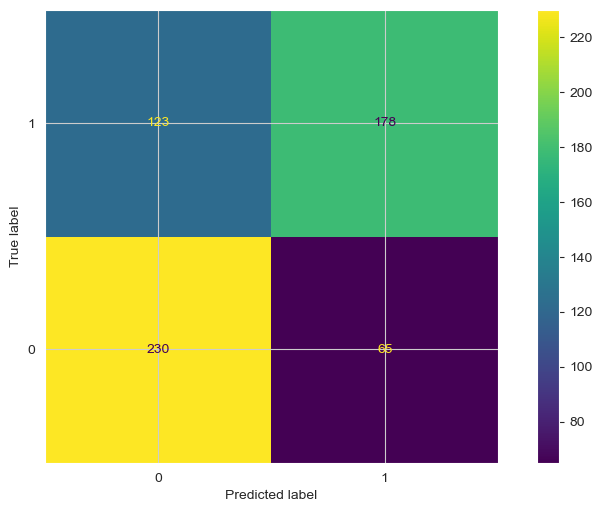

 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       295
           1       0.73      0.59      0.65       301

    accuracy                           0.68       596
   macro avg       0.69      0.69      0.68       596
weighted avg       0.69      0.68      0.68       596

------------------------------------------------------------------


In [81]:
pred_ann = ann.predict(X_test)
preds_ann = (pred_ann > 0.5) * 1
scores = ann.evaluate(X_test, y_test, verbose=1)
cfm = confusion_matrix(y_test, preds_ann)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
print("Confusion Matrix")
plt.show()
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, preds_ann))
print('------------------------------------------------------------------')